# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
# 필요한 모듈 불러오기
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [50]:
spam = pd.read_csv('/content/drive/MyDrive/대학원/투빅스/week7/week7_nlp_basic/과제/spam.csv')

In [51]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [52]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Tokenizing


In [53]:
import nltk

In [72]:

from nltk import word_tokenize

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [75]:

nltk.download('stopwords')
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

result = []
for sentence in spam.v2:
  words = word_tokenize(sentence)
  # 불용어 및 특수문자 제거
  words = [re.sub(r"[^a-z0-9]+", "", word.lower()) for word in words if word not in stop_words]
  result.append([word for word in words if word != ''])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

In [76]:
result

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  '2',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  '87121',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  't',
  'c',
  's',
  'apply',
  '08452810075over18',
  's'],
 ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'],
 ['nah', 'i', 'nt', 'think', 'goes', 'usf', 'lives', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  's',
  '3',
  'week',
  's',
  'word',
  'back',
  'i',
  'd',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  '150',
  'rcv'],
 ['even',
  'brother',
  'like',
  'speak',
  'they',
  'treat',
  'like',
  'aids',
  'patent'],
 ['as',
  'per',
  'request',
  'melle',
  'melle',
  'oru',
  'minn

In [80]:
# skip-gram
from gensim.models import Word2Vec

model = Word2Vec(result, min_count=5, size=100, window=2, iter=200, sg=1) # skip-gram
model.save('w2v_model_sg')
w2v_model1 = Word2Vec.load('w2v_model_sg')


In [81]:
w2v_model1.most_similar('ok')

<ipython-input-81-0467c2c38583>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  w2v_model1.most_similar('ok')


[('cuz', 0.37837815284729004),
 ('silent', 0.3764954209327698),
 ('song', 0.3748040497303009),
 ('mood', 0.3638298511505127),
 ('alright', 0.34983164072036743),
 ('yijue', 0.34954214096069336),
 ('hostel', 0.3470786511898041),
 ('btnationalrate', 0.3468567728996277),
 ('frens', 0.3451138734817505),
 ('fren', 0.3445119857788086)]

In [82]:
# cbow

from gensim.models import Word2Vec

model = Word2Vec(result, min_count=5, size=100, window=2, iter=200, sg=0) # skip-gram
model.save('w2v_model_cb')
w2v_model2 = Word2Vec.load('w2v_model_cb')
w2v_model2.most_similar('ok')

<ipython-input-82-5d097cccd9c0>:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  w2v_model2.most_similar('ok')


[('alright', 0.3726132810115814),
 ('home', 0.3635557293891907),
 ('u', 0.3467777967453003),
 ('yest', 0.3344358205795288),
 ('anything', 0.33036506175994873),
 ('i', 0.3297880291938782),
 ('back', 0.32635247707366943),
 ('long', 0.2991703748703003),
 ('one', 0.29159432649612427),
 ('no', 0.2880858778953552)]

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

In [89]:
text = []
for res in result:
  for word in res:
    text.append(word)
vectorizer = CountVectorizer()
w = vectorizer.fit_transform(text)


In [93]:
word_counts = pd.DataFrame(
    {'words' : vectorizer.get_feature_names_out(),
    'counts' : w.sum(axis = 0).flat}
)

In [94]:
# wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(background_color='white', max_words=100, width = 400, height = 300)

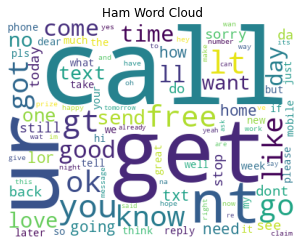

In [95]:
plt.title('Ham Word Cloud')
count_dic = dict(zip(word_counts['words'], word_counts['counts']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

In [ ]:
# nt나 ll같이 좀 더 전처리가 필요해보이는 단어들이 워드클라우드에 많이 나왔음